# TP : Temps d'exécution et complexité - structures de données élémentaires

## I - time et timeit

#### Le package time nous permet de mesurer les temps d'exécutions de portions de code comme dans la cellule ci-dessous dont le but est de mesurer le temps d'exécution d'un appel d'`append` sur une list. On utilise une seule fonction `time_ns` qui nous donne un timestamp en nano-secondes. En calculant ce timestamp avant et après exécution du `append`, on obtient le temps écoulé.

In [39]:
import time
time.perf_counter_ns()

272823270160145

In [40]:
import time
l = list()
start = time.perf_counter_ns()
l.append("add")
end = time.perf_counter_ns()
print((end-start), "nanosecondes")
print(((end-start)*(10^9)), "s")

75008 nanosecondes
225024 s


## I.1 Cryptanalyse

#### Un mot de passe est une chaîne de caractères d'une taille $k$ composée uniquement de chiffres entre 0 et 9. Le code ci-dessous permet de générer des mots de passe aléatoirement pour un $k$ donné, et de réitérer l'opération un certain nombre de fois pour des $k$ variant de $1$ à $5$. L'objectif est de procéder à la cryptanalyse de ces mots de passes par force brute. On va pour cela itérer deux étapes : 
- créer un mot de passe
- vérifier que c'est le bon mot de passe ou non. Si c'est le bon, la procédure se termine.
#### Pour créer le mot de passe suivant, nous allons opérer en ajoutant 1 à notre mot de passe actuel. Exemples : 
add_one_cryptanalyse("0001",4) retourne "0002",
add_one_cryptanalyse("12655",5) retourne "12656".

#### À vous de créer la fonction `add_one_cryptanalyse` qui génère le mot de passe suivant en utilisant le mot de passe actuel et la taille $k$ du mot de passe.

#### Puis vous pourrez exécuter la celle du dessous qui effectue la cryptanalyse : la cellule génère aléatoirement des mots de passe et utilise `add_one_cryptanalyse` pour les trouver. On simule une attaque qui essaierait de trouver des mots de passes, pour des tailles de mots de passe allant de 1 à 5.


#### Quelle forme de courbe obtient-on ? À quelle complexité cela correspond-il ?

In [41]:
import time
import numpy as np
def add_one_cryptanalyse(actuel, taille_k):
    futur=int(actuel)
    futur+=1
    futur=str(futur)
    while(len(futur)<taille_k):
        futur="0" +futur
        
    return futur
    
    return 
print(add_one_cryptanalyse("0001", 4))
print(add_one_cryptanalyse("80616", 5))

0002
80617


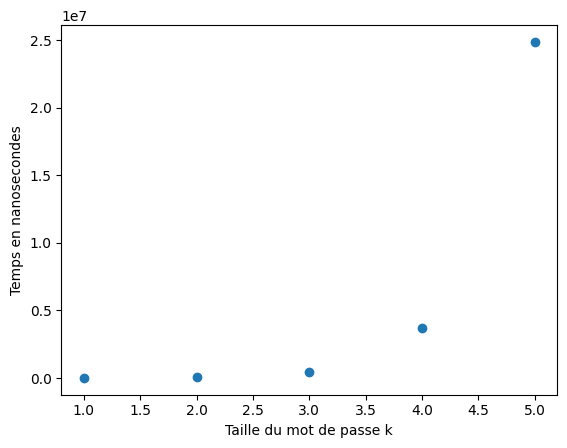

In [42]:
import random 
liste = list(range(1,6))
temps = []
#Taille des mots de passes générés
for k in liste:
    runs = []
    # On génère 10 mots de passe pour chaque taille
    for i in range(10):
        a_deviner = ""
        # Pour générer un mot de passe de la bonne taille
        for j in range(k):
            # On génère k entiers entre 0 et 9
            a_deviner += str(random.randint(0, 9))
        # On commence la cryptanalyse : on va essayer de trouver le mot de passe généré
        # On commence par k 0 comme candidat
        res="0"*k
        start = time.perf_counter_ns()
        # Tant qu'on a pas trouvé le mot de passe, on génère le candidat suivant
        while (res != a_deviner):
            res = add_one_cryptanalyse(res, k)
        end = time.perf_counter_ns()
        runs.append((end-start))
    temps.append(np.mean(runs))

import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Taille du mot de passe k")
plt.ylabel("Temps en nanosecondes")
plt.scatter(liste, temps)
plt.show()

----------------------------
## I.2. Exponentiation dichotomique

#### Programmer un algorithme qui calcule la puissance $k$ d'un chiffre $a$, soit $a^k$ en utilisant des multiplications. 

In [43]:
def exponentiation(a, k):
    res=1
    for i in range(k):
        res*=a
    return res
exponentiation(2,10)

1024

#### Exécuter le code qui suit. Que se passe-il quand $k$ grandit ?

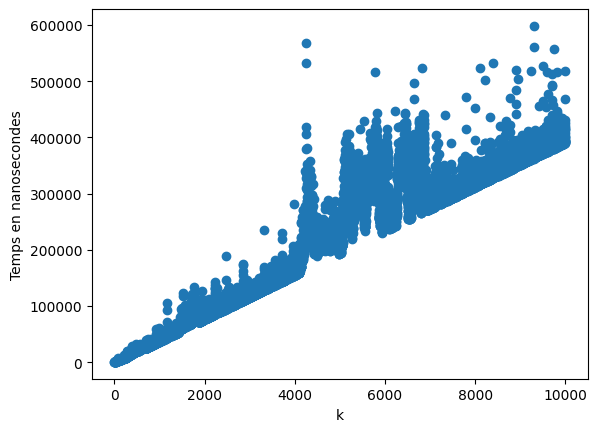

In [44]:
temps = []
ks = list(range(10000))
for k in ks:
    runs = []
    for i in range(10):
        start = time.perf_counter_ns()
        exponentiation(1.00001, k) 
        end = time.perf_counter_ns()
        runs.append((end - start))
    temps.append(np.mean(runs))
plt.figure()
plt.xlabel("k")
plt.ylabel("Temps en nanosecondes")
plt.scatter(ks, temps)
plt.show()

#### Nous allons maintenant implémenter l'algorithme de puissance rapide ou d'exponentiation dichotomique. Celui-ci s'implémente facilement de façon récursive, mais la récursion n'est pas le meilleur moyen d'avoir un algorithme qui s'exécute rapidement. Nous allons donc l'implémenter itérativement.
#### Que se passe-t-il quand $k$ grandit ?
L'algorithme est décrit comme suit :
```
Entrée: a, k
Sortie: a^k
Fonction exponentiation_dichotomique(a, k) ;
    u ← 1; v ← a ; 
    tantque k > 1 faire
        si k pair alors
            v ← v ∗ v  
            k ← k // 2
        sinon
            u ← u ∗ v; 
            v ← v ∗ v; 
            k ← k // 2
        fsi
    ftantque
    retourner u ∗ v;
```

In [45]:
def exponentiation_dichotomique(a, k):
    u = 1
    v = a
    while(k> 1):
        if(k%2==0):
            v*=v
        else:
            u*=v
            v*=v
        k//=2
    return u * v

exponentiation_dichotomique(2,8)

256

In [46]:
#Division entière
5 // 2

2

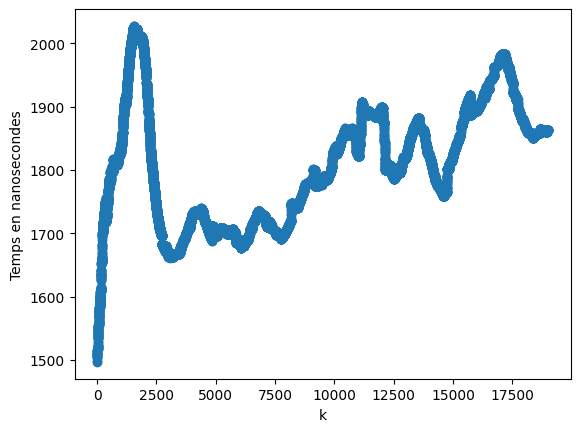

In [47]:
temps = []
ks = list(range(20000))
for k in ks:
    runs = []
    for i in range(10):
        start = time.perf_counter_ns()
        exponentiation_dichotomique(1.0001, k) 
        end = time.perf_counter_ns()
        runs.append((end - start))
    temps.append(np.mean(runs))
w = 1000
l = []
for i in range(len(temps) - w):
    l.append(np.mean(temps[i:i+w]))
plt.figure()
plt.scatter(list(range(len(l))), l)
plt.xlabel("k")
plt.ylabel("Temps en nanosecondes")
plt.show()

### I.1. list et append, quelle complexité observée ?
#### Lancer $k$ appels de la fonction `append` et calculer le temps d'exécution de chacun de ces appels.

In [48]:
l=list()
k=10
for i in range(k):
    start = time.perf_counter_ns()
    l.append("add")
    end = time.perf_counter_ns()
    print((end-start),"nanosecondes")

592 nanosecondes
587 nanosecondes
762 nanosecondes
403 nanosecondes
435 nanosecondes
355 nanosecondes
285 nanosecondes
268 nanosecondes
848 nanosecondes
220 nanosecondes


#### Nous allons utiliser cette approche pour mesurer les temps d'exécution de l'exécution d'append lorsqu'on la répète et voir si le temps d'exécution varie. Lancer $k$ appels de la fonction `append` et calculer le temps d'exécution de chacun de ces appels. Stocker ce temps d'exécution dans une `list`.

In [49]:
import time
l = list()
temps=[]
k = 100000
for i in range(k):
    start = time.perf_counter_ns()
    l.append("add")
    end = time.perf_counter_ns()
    temps.append(end-start)
    


#### Avec matplotlib.pyplot, créer un histogramme qui permette de voir la distribution des valeurs de temps d'exécution. Comment lire un tel histogramme ? En abscisse, on a les temps d'exécution, et en ordonnée leur nombre d'occurrences. L'histogramme affiché vous semble-t-il intéressant ? Pour tenter de comprendre, afficher le temps d'exécution maximal, l'écart type de ces temps d'exécutions, et comparer ces valeurs avec les temps d'exécutions observées précédemment.

In [50]:
import matplotlib.pyplot as plt
plt.hist?

In [51]:
import numpy as np
np.max?

In [52]:
np.std?

max 123480
min 942.6382543333727


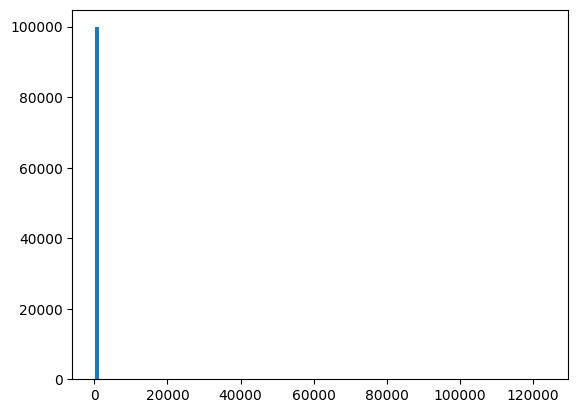

In [53]:
plt.hist( temps,bins=100)
print("max",np.max(temps))
print("min",np.std(temps))


#### On observe que la valeur maximum est très élevée par rapport aux temps d'exécution usuels. Cela correspond au fait que la `list` en Python est gérée par l'intermédiaire d'un tableau : certaines exécution de `append` aboutissent au redimensionnement du tableau et sont donc très longues. Nous allons les supprimer pour mieux visualiser les données. Pour cela, utiliser une compréhension de liste et la fonction `percentile` de numpy. Supprimons ainsi les valeurs supérieures au 99ieme percentile de notre tableau `temps`. Retracer l'histogramme, que constatez-vous ?

Remarque : Ces valeurs que nous supprimons, nous les appelons parfois aberrations statistiques (ou outliers), elles gênent la visualisation du reste des données

In [54]:
percentile = np.percentile(temps,99)

In [55]:
temps2 = [x for x in temps if x < percentile]

Text(0, 0.5, 'nb de append')

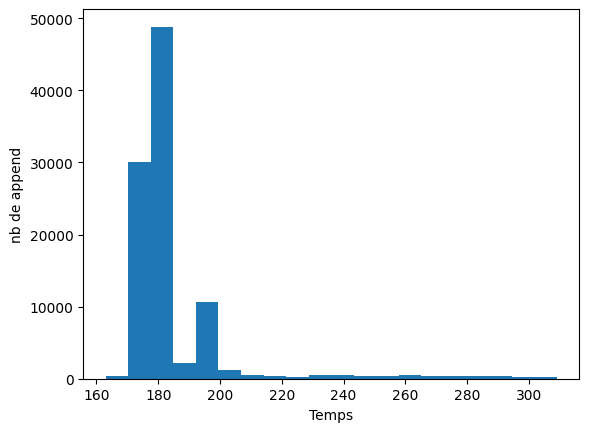

In [56]:
plt.hist(temps2,bins=20)
plt.xlabel("Temps")
plt.ylabel("nb de append")

#### Les temps d'insertion ne semblent pas grandir avec la taille de la liste. Pour nous en assurer, nous allons faire un scatter plot de tous ces temps d'exécutions.

In [57]:
plt.scatter?

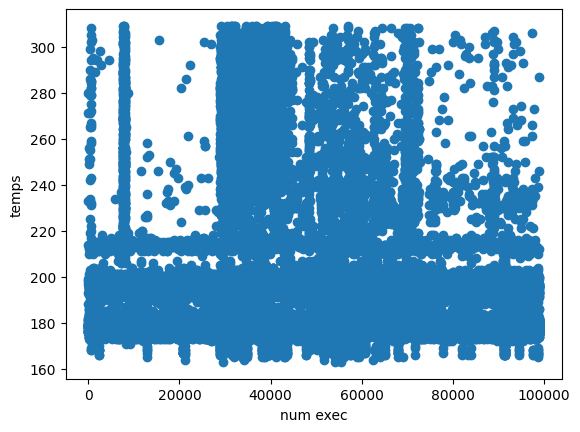

In [58]:
plt.figure()
plt.scatter(range(len(temps2)),temps2)
plt.xlabel("num exec")
plt.ylabel("temps")
plt.show()

#### Pour réussir à affichier un résultat lisible, on va appliquer ce qu'on appelle un lissage. En effet, les variations qu'on observe sont dûes à de l'aléatoire ou à des phénomènes externes à l'exécution de notre instruction. Il s'agit de variations en nanosecondes, soit des temps extrêment faibles sur lesquels toute variation peut sembler importante. Pour gommer un peu ces variations et observer une tendance, on va se servir d'un lissage par moyenne mobile comme vu en TD.

#### Sur la liste qui contient nos temps d'exécutions, on va déplacer une fenêtre de taille $k$, indice par indice. On calculera avant chaque déplacement la moyenne des $k$ points au sein de la fenêtre. Cela conduira à gommer les variations aléatoires. Essayez avec plusieurs valeurs de $k$ !

#### Pour réaliser cette moyenne mobile :
- la fonction mean de numpy vous sera utile
- le slicing de list sera utile

In [59]:
np.mean([3,4,5])

4.0

In [60]:
l=list(range(100))
print(l[5:11])
np.mean(l[5:11])

[5, 6, 7, 8, 9, 10]


7.5

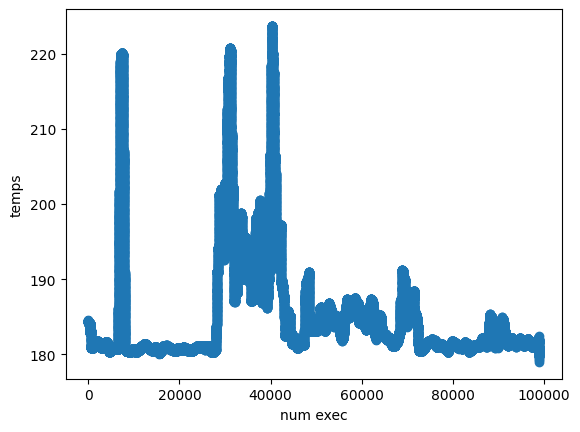

In [61]:
def moyenneMobile(l,k):
    lisse=list()
    for i in range(len(l)):
        lisse.append(np.mean(temps2[i:i+k]))
    return lisse


temps3=moyenneMobile(temps2,1000)

plt.figure()
plt.scatter(range(len(temps3)),temps3)
plt.xlabel("num exec")
plt.ylabel("temps")
plt.show()

#### Qu'observe-t-on ? Le temps d'exécution d'`append` évolue-t-il avec la taille de la liste ? Est-ce cohérent avec ce qu'on sait sur la structure sous-jacente de la liste ?

#### Reproduire l'expérimentation ci-dessus, mais au lieu de considérer l'opération d'`append` dans une `list`, nous allons nous intéresser à l'insertion dans un tableau trié. Pour cela, nous utilisons `bisect` qui sert notamment à maintenir une liste triée. Quelle semble être la complexité d'insertion dans le tableau trié ?

#### Pour l'expérimentation, vous insèrerez des entiers aléatoires dans le tableau trié avec `random.randint(0,1000000000)`, puis vous visualiserez les données. Si la visualisation de donne rien, vous pouvez supprimer les outliers (données au-dessus du 99ieme percentile) et appliquer une moyenne mobile.

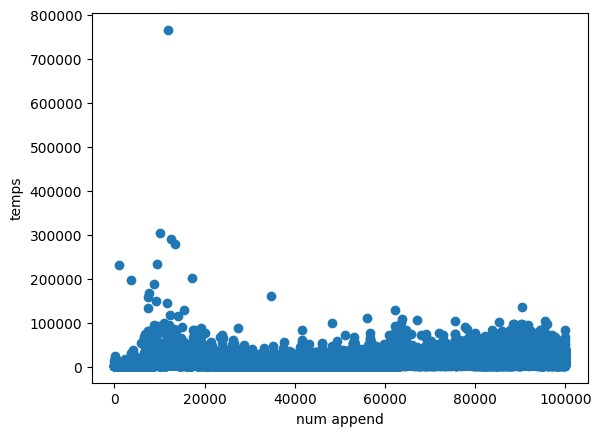

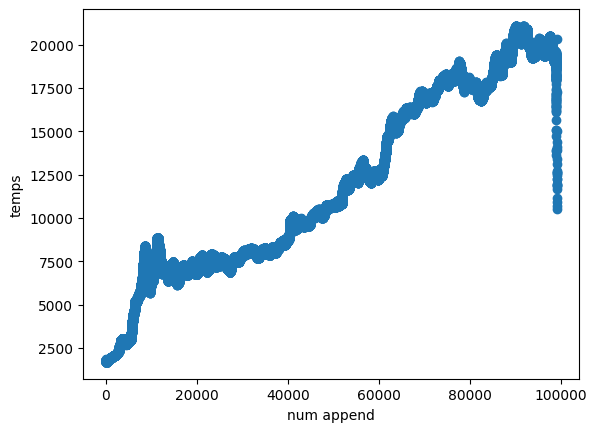

In [63]:
import bisect
import random
l=list()
temps=[]
k = 100000
for i in range(k):
    start=time.perf_counter_ns()
    bisect.insort(l, random.randint(0,1000000000))
    end=time.perf_counter_ns()
    temps.append(end-start)

#Afficher le contenu la list temps
plt.figure()
plt.scatter(range(len(temps)),temps)
plt.xlabel("num append")
plt.ylabel("temps")
plt.show()

#Suppression des outliers
percentile = np.percentile(temps,99)
temps2 = [x for x in temps if x < percentile]
    
#Suppression de la moyenne mobile
temps3=moyenneMobile(temps2,1000)

#Afficher le contenu la list temps après suppression des outliers et application de la moyenne mobile
plt.figure()
plt.scatter(range(len(temps3)),temps3)
plt.xlabel("num append")
plt.ylabel("temps")
plt.show()

#### Avec timeit, il est possible de lancer une opération un certain nombre de fois et de calculer son temps d'exécution. Pour opérer une telle opération, il vous faudra instancier un setup. Créer une fonction qui lance $k$ append avec timeit et mesurer le temps d'exécution.

In [64]:
import timeit
timeit.timeit?

In [65]:
import timeit
import bisect
def run_k_append(k):
    setup ='''
l=list()
    '''
    cmd = 'l.append(1)'
    return timeit.timeit(cmd, setup=setup, number=k)
run_k_append(1000)

7.060298230499029e-05

#### Exécuter cette fonction `run_k_append` avec k= 1000, 10.000, 100.000, 1.000.000, 10.000.000 et 100.000.000
#### À chaque fois, stocker les valeurs d'exécution dans une liste. Créer un scatterplot pour visualiser ces temps d'exécution comme précédemment. Utiliser une échelle log-log. Qu'observez-vous ?

#### Pour une échelle log-log : 
```
ax.set_yscale('log')
ax.set_xscale('log')
```

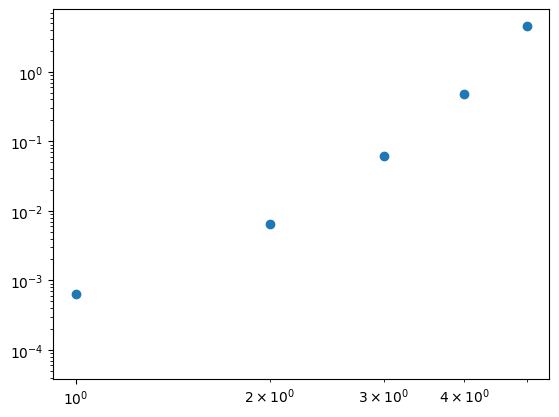

In [66]:
xs = [1000, 10000, 100000, 1000000, 10000000, 100000000]
temps=[]
for x in xs:
    temps.append(run_k_append(x))

fig,ax= plt.subplots()
plt.scatter(range(len(temps)),temps)
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

#### Pour aller plus loin, nous allons essayer de voir si une régression linéaire permettrait de bien modéliser les points de données obtenus. Pour cela, nous allons au préalable calculer plus de points, puis opérer la régression linéaire.

#### Rappel : une régression linéaire permet de trouver une fonction f(x)= ax + b telle que cette fonction permet de suivre les données observées.

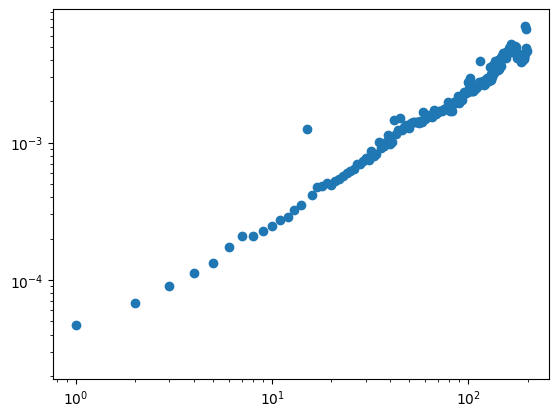

In [67]:
xs = list(range(500, 100000, 500))
temps=[]
for x in xs:
    temps.append(run_k_append(x))

fig,ax= plt.subplots()
plt.scatter(range(len(temps)),temps)
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

#### On fitte la régression linéaire avec les xs et le temps, puis on prédit le temps en fonctions des xs.

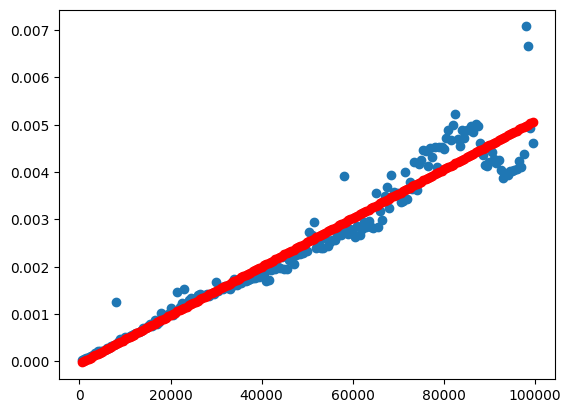

In [68]:
from sklearn.linear_model import LinearRegression
xs = np.reshape(xs,(-1,1))
reg = LinearRegression().fit(xs, temps)
y_reg = reg.predict(xs)

fig,ax= plt.subplots()
plt.scatter(xs,temps)
plt.scatter(xs,y_reg,color='red')
plt.show()

---------------- 

### I.2. Création de liste : quels temps d'exécution en fonction de la taille ?

#### Vous disposez de :
- une liste de valeurs indiquant les tailles de listes à créer
- la fonction plot_error_bar pour tracer des scatterplot capables d'indiquer un écart-type (error). 
- la fonction repeat de timeit qui permet de répeter une opération $k$ fois et de récupérer les $k$ temps de run

Vous avez pour objectif de tester les approches de création de liste suivantes et de les comparer. L'objectif est de créer une liste qui contient les entiers de 0 à k :
- Par compréhension de liste : `[i for i in range(k)]`
- Par append itératifs : 
```
for i in range(k): 
    l.append(i)
```
- Par initialisation avec des 0 puis affectation par les indices 
```
l = [0] * k
for i in range(k): 
    l[i]=i
```
- via le cast d'un range : `list(range(k))`

À vous de jouer !

In [ ]:
timeit.repeat?

In [105]:
#### Valeurs à utiliser pour les tailles de listes
liste = range(5000, 50000, 1000)

#### Fonction de plot
import numpy as np
import matplotlib.pyplot as plt
def plot_error_bar(xs, ys, error, ymin, ymax):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    plt.errorbar(xs, ys, error, linestyle='None', marker='^')
    plt.ylim(ymin, ymax)
    plt.show()
    

In [84]:
setup = """
taille_liste=50
"""
test = """
[a for a in range(taille_liste)]
"""

timeit.repeat(test,setup,repeat=5,number=1000)

[0.00199494999833405,
 0.002006006019655615,
 0.002644146967213601,
 0.0019245549920015037,
 0.001917479035910219]

In [88]:
%%timeit -r 5 -n 1000 -o
taille_liste = 50

[x for x in range(taille_liste)]

2.08 µs ± 98.6 ns per loop (mean ± std. dev. of 5 runs, 1,000 loops each)


<TimeitResult : 2.08 µs ± 98.6 ns per loop (mean ± std. dev. of 5 runs, 1,000 loops each)>

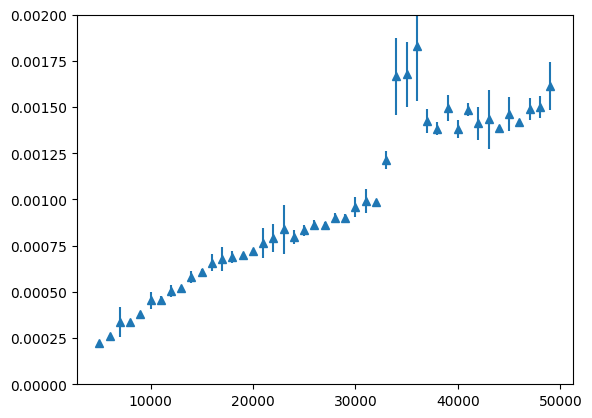

In [107]:


ymin = 0
ymax = 0.002
means = []
stds = []


for i in liste:
    test = f'''[a for a in range({i})]'''
    temps=timeit.repeat(test,repeat=5,number=1)
    means.append(np.mean(temps))
    stds.append(np.std(temps))

plot_error_bar(liste, means, stds, ymin, ymax)



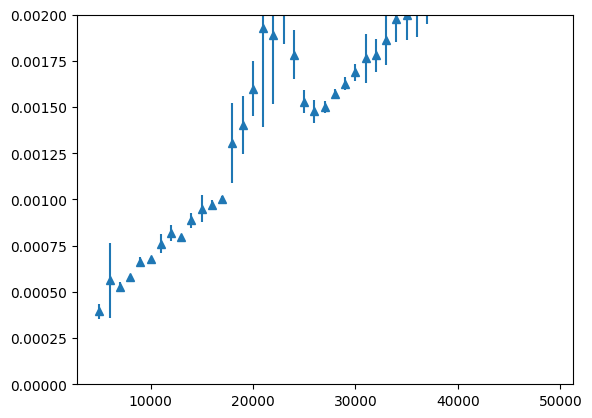

In [122]:
means = []
stds = []


for i in liste:
    test = f'''
l=list()
for i in range({i}): 
    l.append(i)'''
    temps=timeit.repeat(test,repeat=5,number=1)
    means.append(np.mean(temps))
    stds.append(np.std(temps))

plot_error_bar(liste, means, stds, ymin, ymax)

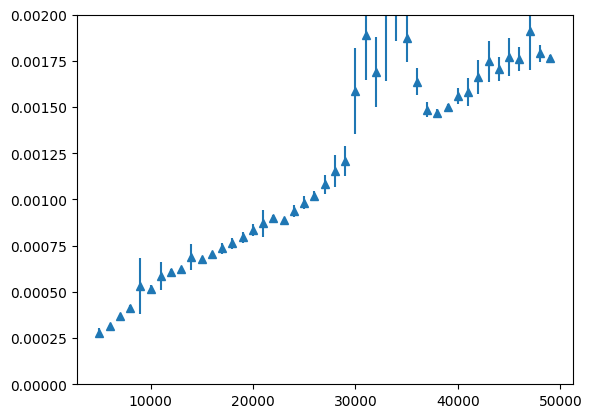

In [125]:
means = []
stds = []

for i in liste:
    test = f'''
l = [0] * {i}
for i in range({i}): 
  l[i]=i'''
    temps=timeit.repeat(test,repeat=5,number=1)
    means.append(np.mean(temps))
    stds.append(np.std(temps))

plot_error_bar(liste, means, stds, ymin, ymax)

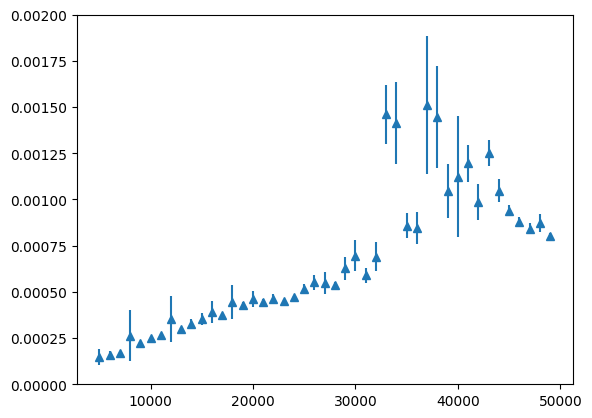

In [110]:
means = []
stds = []

for i in liste:
    test = f'''[list(range({i}))]'''
    temps=timeit.repeat(test,repeat=5,number=1)
    means.append(np.mean(temps))
    stds.append(np.std(temps))

plot_error_bar(liste, means, stds, ymin, ymax)

### I.3. Comparaison du set et de la list pour les tests d'existence

L'objectif est d'initialiser une list et un set avec des tailles allant de 2000 à 11000 par palliers de 500. On va ensuite pour chaque taille, aller chercher l'existence d'un nombre qui existe dans la structure de données, soit un nombre aléatoire entre 0 et la taille de la stucture de données. On effectue cette recherche 2000 fois, et on répète l'opération 10 fois. On procède à un scatterplot via la fonction `plot_error_bar`. Que constatez-vous ?

In [ ]:
random.randint?

In [ ]:

liste = range(2000, 11000, 500)

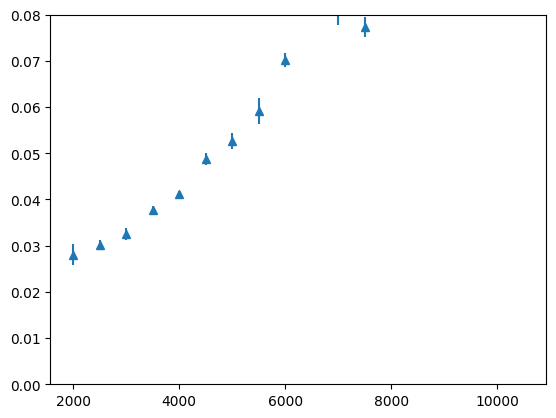

In [129]:
import random

liste = range(2000, 11000, 500)

means = []
stds = []

ymin = 0
ymax = 0.08

setup='''
import random 
l = list(range('''+str(np.max(liste))+'''))
'''

for i in liste:
    test=f'random.randint(0,{i}) in l'
    temps=timeit.repeat(test,setup,number=2000,repeat=5)
    means.append(np.mean(temps))
    stds.append(np.std(temps))

plot_error_bar(liste, means, stds, ymin, ymax)

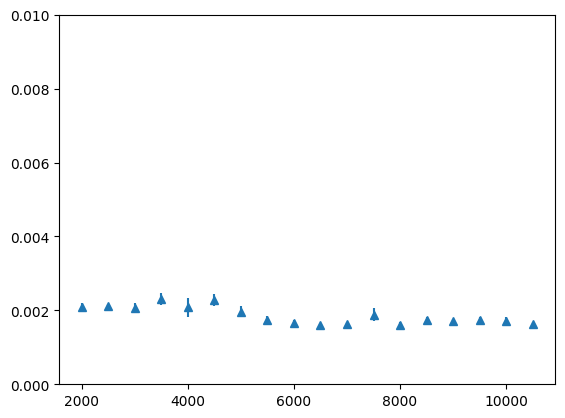

In [130]:
means = []
stds = []

ymin = 0
ymax = 0.01


setup='''
import random 
l = set(range('''+str(np.max(liste))+'''))
'''

for i in liste:
    test=f'random.randint(0,{i}) in l'
    temps=timeit.repeat(test,setup,number=2000,repeat=5)
    means.append(np.mean(temps))
    stds.append(np.std(temps))

plot_error_bar(liste, means, stds, ymin, ymax)

#### L'objectif est maintenant d'initialiser une list et un set avec des tailles allant de 2000 à 11000 par palliers de 500. On va cette fois, pour chaque taille, aller chercher l'existence de TOUS les nombres qui existent dans la structure de données, soit TOUS les nombres entre 0 et la taille de la stucture de données. On effectue cette recherche 1 fois, et on répète l'opération 10 fois. On procède à un scatterplot via la fonction `plot_error_bar`. Que constatez-vous ?

In [ ]:
liste = range(2000, 11000, 500)

means = []
stds = []

ymin = 0
ymax = 0.5


plot_error_bar(liste, means, stds, ymin, ymax)

In [ ]:
liste = range(2000, 100000, 2000)

means = []
stds = []

ymin = 0
ymax = 0.01



plot_error_bar(liste, means, stds, ymin, ymax)

## II. Implémentation d'un dictionnaire

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def plot_error_bar(xs, ys, error, ymin=None, ymax=None):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    plt.errorbar(xs, ys, error, linestyle='None', marker='^')
    if ymin and ymax:
        plt.ylim(ymin, ymax)
    plt.show()



Comme nous venons de le voir, les objets `set` sont très pratiques pour retrouver facilement et rapidement des données. Les dictionnaires (`dict` en Python) nous permettent d'effectuer la même chose, mais en associant une valeur à la clé.

Nous allons implémenter nous-mêmes notre propre classe de dictionnaire Python sans utiliser l'objet `set` ni `dict`. Pour cela nous allons à la place utiliser une table de hashage.
Voici quelques caractéristiques de notre future classe `Dico` :
- la création d'un `Dico` construira un dictionnaire vide ;
- le contenu de notre dictionnaire sera stocké dans une liste, l'index sera obtenu grâce à la fonction de hashage `hash(clé)` ;
- vous définirez la méthode `_get_idx` qui associe une clé à son l'indice dans la table de hashage ;
- vous définirez la méthode `__setitem__` qui permet d'ajouter une valeur associée à une clé dans notre dictionnaire ;
- vous définirez la méthode `__getitem__` qui permet de récupérer la valeur associée à une clé dans notre dictionnaire (KeyError si l'élément n'existe pas) ;
- vous définirez la méthode `__delitem__` qui permet de supprimer la valeur associée à la clé dans notre dictionnaire (KeyError si l'élément n'existe pas) ;
- vous définirez la méthode `__contains__` qui renvoie `True` si la clé existe dans le dictionnaire ou `False` sinon ;
- vous définirez la méthode `keys` qui renvoie une liste de toutes les clés contenues dans notre dictionnaire ;

### Comment stocker nos éléments ?

Nous souhaitons stocker les données suivantes dans notre dictionnaire :
```python
{
    'TOTO': 'a',
    'tutu': 'b',
    0.01: 'c',
    42: 'd'
}
```

Chaque clé sera hashée avec la fonction `hash`. Par exemple :
```python
hash('TOTO') #> 6675603031165189107
hash('tutu') #> 414345619093764751
hash(0.01)   #> 23058430092136940
hash(42)     #> 42
```

Nous ne pouvons malheursement pas directement stocker la valeur associée à 'TOTO' à l'indice 6675603031165189107, car nous aurions besoin d'une table vraiment très grande.
Nous allons à la place créer une table d'une taille raisonnable, par exemple 30. En utilisant le modulo, nous pouvons ainsi contenir tous nos éléments dans notre table de taille 30. Pour chaque élément nous enregistrons le tuple (clé, valeur).

```python
tableau = [
    (), (), (), (), (), (), (), (), (), (), (),(), (), (), (),
    (),(), (), (), (), (), (), (), (), (), (), (), (), (), ()
]

hash('TOTO') % 30 #> 27
hash('tutu') % 30 #> 1
hash(0.01)   % 30 #> 20
hash(42)     % 30 #> 12
```

Nous pouvons donc stocker `'TOTO'` à l'indice 27 de notre tableau, `'tutu'` à l'indice 1, ...
```python
table = [
    (), ('tutu', 'b'), (), (), (), (), (), (), (), (), (), (),
    (42, 'd'), (), (), (), (), (), (), (), (0.01, 'c'), (),
    (),(), (), (), (), ('TOTO', 'a'), (), ()
]
```

Essayons maintenant d'ajouter un élément ayant pour clé `72` dans notre dictionnaire :
```python
hash(72) % 30 #> 12
```

Nous avons une collision : `42` était déjà stocké à l'indice 12. Une solution pour éviter ce problème serait d'augmenter la taille de notre table, afin de réduire le risque de collision. Mais nous pourrions toujours en obtenir. Il faut donc trouver une autre solution.
Plutôt que d'éviter les collisions, on va faire avec. Chacune de nos 30 cases de notre table pourra stocker tous les éléments devant s'y trouver, à l'aide d'une liste. Notre table est ainsi une liste de listes :

```python
table = [
    [], [('tutu', 'b')], [], [], [], [], [], [],
    [], [],[], [], [(42, 'd'), (72, 'e')], [],
    [], [], [], [], [], [], [(0.01, 'c')], [], [],
    [], [], [], [], [('TOTO', 'a')], [], []
]
```

Deux éléments se trouvent donc à l'indice `12`, `42: 'd'` et `72: 'e'`.

#### II.1. Implémentation

In [134]:
class Dico:
    
    def __init__(self, init_size=30):
        # TODO: initialiser le dictionnaire à vide
        # pour cela vous avez besoin de créer votre table de hachage qui sera une liste de la taille init_size
        
        self.table = [list()for x in range(init_size)]

    def __setitem__(self, key, value):
        # TODO: ajouter l'élement dans le dictionnaire
        self.table[hash(key)% len(self.table)]=(key,value)
        pass
    
    def __getitem__(self, key):
        # TODO: renvoyer l'élement associé à la clé, si celui-ci n'existe pas, lever l'exception KeyError
        self.table[hash(key)% len(self.table)]=(key,value)
        pass
    
    def __delitem__(self, key):
        # TODO: doit supprimer l'élément du dictionnaire
        pass
    
    def __contains__(self, key):
        # TODO: doit renvoyer True ou False en fonction de si key est contenu dans le dictionnaire
        pass
    
    def _get_idx(self, key):
        # TODO: écrire la méthode transformant key en index dans notre container
        # pour cela il faut utiliser hash() pour transformer notre key en indice unique
        # puis le modulo pour obtenir un indice valide dans notre container
        pass
    
    def keys(self):
        # TODO: écrire la méthode renvoyant toutes les clés contenues dans notre dictionnaire
        # optionel: vous pouvez également écrire la méthode values(self) qui renvoie toutes les valeurs
        # contenues dans le dictionnaire
        pass
    
    def __repr__(self):
        return repr(self.table)


#### II.2. Utilisation du dictionnaire

Maintenant que nous avons une implémentation d'un dictionnaire en Python, nous allons l'utiliser et regarder son coût algorithmique.

In [ ]:
dictionnaire = Dico()
dictionnaire['pomme'] = 4.5
dictionnaire['poire'] = 5.2
dictionnaire['tomate'] = 3.67

dictionnaire

In [ ]:
'tomate' in dictionnaire

In [ ]:
dictionnaire['tomate']

In [ ]:
del dictionnaire['tomate']
'tomate' in dictionnaire

In [ ]:
dictionnaire['abricot']

#### C - Coût algorithmique
Passons maintenant à un exemple plus complexe :

In [ ]:
pays_et_capitales = [
    ["Malta", "Valletta"], ["Croatia", "Zagreb"], ["Macedonia", "Skopje"], ["San Marino", "San Marino"],
    ["Portugal", "Lisbon"], ["Latvia", "Riga"], ["Finland", "Helsinki"], ["Albania", "Tirana"],
    ["Serbia", "Belgrade"], ["Bulgaria", "Sofia"], ["Romania", "Bucharest"], ["Switzerland", "Bern"],
    ["Slovenia", "Ljubljana"], ["Hungary", "Budapest"], ["Liechtenstein", "Vaduz"],
    ["Czech Republic", "Prague"], ["Iceland", "Reykjavík"], ["Bosnia and Herzegovina", "Sarajevo"],
    ["Belgium", "Brussels"], ["Italy", "Rome"], ["Luxembourg", "Luxembourg City"], ["Belarus", "Minsk"],
    ["Republic of Ireland", "Dublin"], ["Moldova", "Chișinău"], ["Estonia", "Tallinn"],
    ["Russia", "Moscow"], ["Vatican City", "Vatican City"], ["Ukraine", "Kiev"], ["Monaco", "Monaco"],
    ["Greece", "Athens"], ["Lithuania", "Vilnius"], ["Slovakia", "Bratislava"], ["Spain", "Madrid"],
    ["Austria", "Vienna"], ["France", "Paris"], ["Sweden", "Stockholm"], ["Andorra", "Andorra la Vella"],
    ["United Kingdom", "London"], ["Poland", "Warsaw"], ["The Netherlands", "Amsterdam"],
    ["Montenegro", "Podgorica"], ["Germany", "Berlin"], ["Norway", "Oslo"], ["Denmark", "Copenhagen"]
]

In [ ]:
capitales = Dico(init_size=50)
for pays, capitale in pays_et_capitales:
    capitales[pays] = capitale

print('France :', capitales['France'])
print('Lettonie :', capitales['Latvia'])
print('Liechtenstein :', capitales['Liechtenstein'])
print('Pologne :', capitales['Poland'])

---
Nous souhaitons afficher le temps d'accès à la capitale des pays en fonction de la taille de la table de hashage. Vous allez réaliser l'expérience avec les tailles de 1 à 100 par palier de 1. Pour chaque dictionnaire ainsi créee, vous devez afficher le temps moyen et son écart type pour l'accès à toutes les capitales des pays.
Quel lien pouvez-vous observer entre la taille de la table et le coût d'accès à l'information ?

In [ ]:
means = []
stds = []

#TODO

plot_error_bar(liste, means, stds)

---
Nous souhaitons ajouter les états des Etats-Unis et leurs capitales associées.
Vous aller afficher le temps nécessaire pour l'insertion des nouvelles capitales dans un dictionnaire, en fonction de la taille de la table de hashage. Vous allez réaliser l'expérience avec les tailles de 1 à 100 par palier de 1. Pour chaque dictionnaire ainsi créee, vous devez afficher le temps moyen et son écart type pour ajouter les états des US et leurs villes capitales.
Quel lien pouvez-vous observer entre la taille de la table et le coût d'accès à l'information ?


In [ ]:
etats_us_et_capitales = [
    ['Alabama', 'Montgomery'],
    ['Alaska', 'Juneau'],
    ['Arizona', 'Phoenix'],
    ['Arkansas', 'Little Rock'],
    ['California', 'Sacramento'],
    ['Colorado', 'Denver'],
    ['Connecticut', 'Hartford'],
    ['Delaware', 'Dover'],
    ['Florida', 'Tallahassee'],
    ['Georgia', 'Atlanta'],
    ['Hawaii', 'Honolulu'],
    ['Idaho', 'Boise'],
    ['Illinois', 'Springfield'],
    ['Indiana', 'Indianapolis'],
    ['Iowa', 'Des Moines'],
    ['Kansas', 'Topeka'],
    ['Kentucky', 'Frankfort'],
    ['Louisiana', 'Baton Rouge'],
    ['Maine', 'Augusta'],
    ['Maryland', 'Annapolis'],
    ['Massachusetts', 'Boston'],
    ['Michigan', 'Lansing'],
    ['Minnesota', 'Saint Paul'],
    ['Mississippi', 'Jackson'],
    ['Missouri', 'Jefferson City'],
    ['Montana', 'Helena'],
    ['Nebraska', 'Lincoln'],
    ['Nevada', 'Carson City'],
    ['New Hampshire', 'Concord'],
    ['New Jersey', 'Trenton'],
    ['New Mexico', 'Santa Fe'],
    ['New York', 'Albany'],
    ['North Carolina', 'Raleigh'],
    ['North Dakota', 'Bismarck'],
    ['Ohio', 'Columbus'],
    ['Oklahoma', 'Oklahoma City'],
    ['Oregon', 'Salem'],
    ['Pennsylvania', 'Harrisburg'],
    ['Rhode Island', 'Providence'],
    ['South Carolina', 'Columbia'],
    ['South Dakota', 'Pierre'],
    ['Tennessee', 'Nashville'],
    ['Texas', 'Austin'],
    ['Utah', 'Salt Lake City'],
    ['Vermont', 'Montpelier'],
    ['Virginia', 'Richmond'],
    ['Washington', 'Olympia'],
    ['West Virginia', 'Charleston'],
    ['Wisconsin', 'Madison'],
    ['Wyoming', 'Cheyenne'],   
]

In [ ]:
means = []
stds = []

#TODO

plot_error_bar(liste, means, stds)

In [ ]:
capitales